# Understanding Polynomials with NumPy (using the `Poly1D` class)

Let us understand the polynomial class `np.poly1d`. Numpy also provides the class `np.polynomial`.

## 1. Representing Polynomials: `numpy.poly1d`

The `numpy.poly1d` function is a convenient way to create a polynomial object in NumPy. You can define a polynomial by providing its coefficients. The coefficients are listed in descending order of power.

### Example
For example, the polynomial $P(x) = 3x^2 + 2x - 1$ can be represented by the coefficients `[3, 2, -1]`:

In [1]:
import numpy as np

# Define the polynomial P(y) = 3y^2 + 2y - 1
P = np.poly1d([3, 2, -1], variable='y')
print("Our polynomial P(y):\n", P)

# Now let us define it as a function of x: P(x) = 3x^2 + 2x - 1
P = np.poly1d([3, 2, -1])
print("\nOur polynomial P(x):\n", P)

# Print the coefficients of the polynomial
print("\nThe coefficients of our polynomial P(x):", P.coeffs)

# Print the order of the polynomial
print("\nThe order of polynomial P(x):", P.order)

Our polynomial P(y):
    2
3 y + 2 y - 1

Our polynomial P(x):
    2
3 x + 2 x - 1

The coefficients of our polynomial P(x): [ 3  2 -1]

The order of polynomial P(x): 2


## 2. Evaluating Polynomials: `numpy.polyval`

The `numpy.polyval` function allows you to evaluate a polynomial at one or more specific points. While the `poly1d` object itself can be called like a function to evaluate the polynomial, `polyval` is also available and useful when you have the coefficients directly.

### Example
Let's evaluate our polynomial $P(x) = 3x^2 + 2x - 1$ at $x = 5$ and $x = -2$:

In [2]:
# Evaluate P(x) at x = 5
val_at_5 = P(5) # or np.polyval(P, 5)
print(f"P(5) = {val_at_5}")

# Evaluate P(x) at x = -2
val_at_minus_2 = np.polyval(P, -2)
print(f"P(-2) = {val_at_minus_2}")

# Evaluate P(x) for an array of x values
x_values = [0, 1, 2, 3]
P_at_x_values = P(x_values)
print(f"P(x) for x_values {x_values} is: {P_at_x_values}")

P(5) = 84
P(-2) = 7
P(x) for x_values [0, 1, 2, 3] is: [-1  4 15 32]


## 3. Finding Roots of a Polynomial: `numpy.roots`

The roots of a polynomial are the values of $x$ for which $P(x) = 0$. The `numpy.roots` function takes an array of polynomial coefficients and returns the roots.

For a quadratic equation $ax^2 + bx + c = 0$, the roots are given by the quadratic formula: $x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$. `numpy.roots` generalizes this for any degree polynomial.

### Example
Let's find the roots of another polynomial $Q(x) = x^3 - 6x^2 + 11x - 6$.

In [3]:
# Let's define another polynomial
# Q(x) = x^3 - 6x^2 + 11x - 6
Q = np.poly1d([1, -6, 11, -6])
print("\nOur polynomial Q(x):\n", Q)

# Find the roots of Q (method 1)
roots_Q = np.roots(Q)
print(f"\nThe roots of Q(x) are (method 1): {roots_Q}")

# Find the roots of Q
print(f"\nThe roots of Q(x) are (method 2): {Q.roots}")


Our polynomial Q(x):
    3     2
1 x - 6 x + 11 x - 6

The roots of Q(x) are (method 1): [3. 2. 1.]

The roots of Q(x) are (method 2): [3. 2. 1.]


## 4. Constructing a Polynomial from its Roots: `numpy.poly`

The `numpy.poly` function is the inverse of `numpy.roots`. Given a sequence of roots, it returns the coefficients of the polynomial that has those roots. This is useful when you know the desired behavior (roots) of a system and want to define its governing polynomial.

If the roots are $r_1, r_2, \ldots, r_n$, the polynomial can be written as $(x - r_1)(x - r_2)\cdots(x - r_n)$.

### Example
Let's reconstruct the polynomial $Q(x)$ using its roots, which we found to be approximately `[3., 2., 1.]`:

In [4]:
# Reconstruct polynomial Q(x) from its roots
reconstructed_Q_coeffs = np.poly(roots_Q)
print(f"Coefficients of Q(x) reconstructed from roots: {reconstructed_Q_coeffs}")

# We can then create a poly1d object from these coefficients
reconstructed_Q = np.poly1d(reconstructed_Q_coeffs)
print("\nReconstructed polynomial Q(x):\n", reconstructed_Q)

Coefficients of Q(x) reconstructed from roots: [ 1. -6. 11. -6.]

Reconstructed polynomial Q(x):
    3     2
1 x - 6 x + 11 x - 6


## 5. Polynomial Fitting: `numpy.polyfit`

`numpy.polyfit` is a powerful function used to find the coefficients of a polynomial that best fits a given set of data points. This is a common task in engineering for curve fitting experimental data, trend analysis, and modeling. It uses a least-squares approach to minimize the sum of the squares of the differences between the observed and predicted values.

The function takes `x` coordinates, `y` coordinates, and the desired degree of the polynomial.

### Example

Suppose we have some experimental data and we want to fit a quadratic polynomial to it.

Coefficients of the fitted polynomial: [ 0.92326197 -5.30635348  9.32109771 -5.24010897]

Fitted polynomial Q_fit(x):
         3         2
0.9233 x - 5.306 x + 9.321 x - 5.24


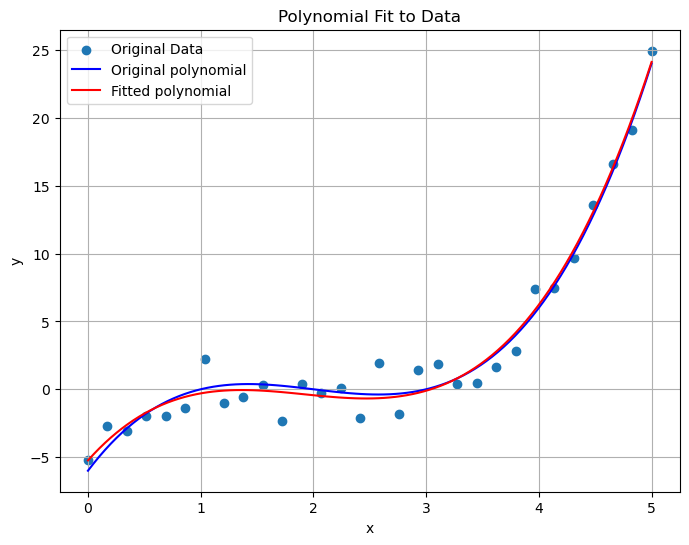

In [5]:
# Experimental data
n_data = 30
x_data = np.linspace(0, 5, n_data)
y_data = Q(x_data) + np.random.randn(n_data)

# Fit a 3rd degree polynomial to the data
# The result will be the coefficients [a, b, c, d] for ax^3 + bx^2 + cx + d
coeffs_fit = np.polyfit(x_data, y_data, 3)
print(f"Coefficients of the fitted polynomial: {coeffs_fit}")

# Create a poly1d object from the fitted coefficients
Q_fit = np.poly1d(coeffs_fit)
print("\nFitted polynomial Q_fit(x):\n", Q_fit)

# Let's plot the original data and the fitted polynomial
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Original Data')
x_plot = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x_plot, Q(x_plot),     color='blue', label='Original polynomial')
plt.plot(x_plot, Q_fit(x_plot), color='red',  label='Fitted polynomial')
plt.title('Polynomial Fit to Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## 6. Polynomial Differentiation: `numpy.polyder`

Differentiation of polynomials is essential for finding slopes, rates of change, and critical points (maxima/minima). `numpy.polyder` returns the coefficients of the derivative of a polynomial.

If $P(x) = \sum_{i=0}^n a_i x^i$, then $\frac{dP}{dx} = \sum_{i=1}^n i a_i x^{i-1}$. `polyder` applies this rule term by term.

### Example
Let's find the first and second derivatives of our polynomial $P(x) = 3x^2 + 2x - 1$:

In [6]:
# Our original polynomial P(x)
print("Original P(x):\n", P)

# First derivative of P(x)
P_prime = np.polyder(P)
print("\nFirst derivative P'(x):\n", P_prime)

# Second derivative of P(x) (derivative of P_prime)
P_double_prime = np.polyder(P_prime)
print("\nSecond derivative P''(x):\n", P_double_prime)

# Alternatively, you can directly differentiate the poly1d object
P_prime = P.deriv(m=1) # m=1 for first derivative
print("\nFirst derivative P'(x) (using .deriv()):\n", P_prime)

P_double_prime = P.deriv(m=2) # m=2 for second derivative
print("\nSecond derivative P''(x) (using .deriv()):\n", P_double_prime)

Original P(x):
    2
3 x + 2 x - 1

First derivative P'(x):
  
6 x + 2

Second derivative P''(x):
  
6

First derivative P'(x) (using .deriv()):
  
6 x + 2

Second derivative P''(x) (using .deriv()):
  
6


## 7. Polynomial Integration: `numpy.polyint`

Integration of polynomials is used in calculations involving areas, volumes, and cumulative effects. `numpy.polyint` returns the coefficients of the indefinite integral of a polynomial. You can also specify the constant of integration.

If $P(x) = \sum_{i=0}^n a_i x^i$, then $\int P(x) dx = \sum_{i=0}^n \frac{a_i}{i+1} x^{i+1}$ + C.


### Example
Let's find the indefinite integral of $P(x) = 3x^2 + 2x - 1$. We'll set the constant of integration to 10.

In [ ]:
# Our original polynomial P(x)
print("Original P(x):\n", P)

# Indefinite integral of P(x) with integration constant C = 10
P_integral_1 = np.polyint(P, k=10) # k is the constant of integration
print("\nIndefinite integral of P(x) (C=10):\n", P_integral_1)

P_integral_2 = np.polyint(P, m=2, k=[10, 20]) # k are the constants of integration
print("\nIntegral of the integral of P(x) (C=10):\n", P_integral_2)

# Let's verify by differentiating the integral
P_integral_prime = P_integral_1.deriv()
print("\nDerivative of the integral of P(x):\n", P_integral_prime) # This should be P(x)

# Alternatively, you can directly integrate the poly1d object
P_integral_1 = P.integ(m=1, k=10) # m=1 for single integration
print("\nIndefinite integral of P(x) (using .integ(), C=10):\n", P_integral_1)

# Maybe you need to integrate twice directly:
P_integral_2 = P.integ(m=2, k=[10, 20]) # m=1 for integrating twice
print("\nIntegral of the integral of P(x) (using .integ(), C_1=10, C_2=20):\n", P_integral_2)

Original P(x):
    2
3 x + 2 x - 1

Indefinite integral of P(x) (C=10):
    3     2
1 x + 1 x - 1 x + 10

Integral of the integral of P(x) (C=10):
       4          3       2
0.25 x + 0.3333 x - 0.5 x + 10 x + 20

Derivative of the integral of P(x):
    2
3 x + 2 x - 1

Indefinite integral of P(x) (using .integ(), C=10):
    3     2
1 x + 1 x - 1 x + 10

Integral of the integral of P(x) (using .integ(), C=10):
       4          3       2
0.25 x + 0.3333 x - 0.5 x + 10 x + 20


## 8. Polynomial Addition: `numpy.polyadd`

Polynomial addition involves adding the coefficients of like powers. `numpy.polyadd` takes two arrays of polynomial coefficients and returns the coefficients of their sum.

If $P_1(x) = a_nx^n + \dots + a_0$ and $P_2(x) = b_mx^m + \dots + b_0$, then $(P_1 + P_2)(x)$ is obtained by adding corresponding coefficients.

### Example
Let $P_1(x) = 3x^2 + 2x - 1$ and $P_2(x) = x^3 - 4x + 5$.

In [8]:
# Define P1(x) and P2(x)
P1 = np.poly1d([3, 2, -1])
P2 = np.poly1d([1, 0, -4, 5]) # x^3 - 4x + 5

print("\nP1(x):\n", P1)
print("\nP2(x):\n", P2)

# Add the polynomials
P_sum = np.polyadd(P1, P2)
print("\nSum of P1(x) and P2(x):\n", P_sum)

# Alternatively, you can directly add poly1d objects
P_sum = P1 + P2
print("\nSum of P1(x) and P2(x) (direct addition):\n", P_sum)


P1(x):
    2
3 x + 2 x - 1

P2(x):
    3
1 x - 4 x + 5

Sum of P1(x) and P2(x):
    3     2
1 x + 3 x - 2 x + 4

Sum of P1(x) and P2(x) (direct addition):
    3     2
1 x + 3 x - 2 x + 4


## 9. Polynomial Subtraction: `numpy.polysub`

Similar to addition, polynomial subtraction involves subtracting the coefficients of like powers. `numpy.polysub` takes two arrays of polynomial coefficients and returns the coefficients of their difference.

If $P_1(x) = a_nx^n + \dots + a_0$ and $P_2(x) = b_mx^m + \dots + b_0$, then $(P_1 - P_2)(x)$ is obtained by subtracting corresponding coefficients.

### Example
Let's subtract $P_2(x)$ from $P_1(x)$.

In [9]:
# P1(x) and P2(x) are defined above

# Subtract P2(x) from P1(x)
P_diff = np.polysub(P1, P2)
print("\nDifference P1(x) - P2(x):\n", P_diff)

# Alternatively, you can directly subtract poly1d objects
P_diff = P1 - P2
print("\nDifference P1(x) - P2(x) (direct subtraction):\n", P_diff)


Difference P1(x) - P2(x):
     3     2
-1 x + 3 x + 6 x - 6

Difference P1(x) - P2(x) (direct subtraction):
     3     2
-1 x + 3 x + 6 x - 6


## 10. Polynomial Multiplication: `numpy.polymul`

Polynomial multiplication involves multiplying each term of one polynomial by each term of the other and then combining like terms. `numpy.polymul` takes two arrays of polynomial coefficients and returns the coefficients of their product.

The product of two polynomials of degree $n$ and $m$ will have a degree of $n+m$.

### Example
Let's multiply $P_1(x) = 3x^2 + 2x - 1$ and $P_2(x) = x^3 - 4x + 5$.

In [10]:
# P1(x) and P2(x) are defined above

# Multiply the polynomials
P_prod = np.polymul(P1, P2)
print("\nProduct of P1(x) and P2(x):\n", P_prod)

# Alternatively, you can directly multiply poly1d objects
P_prod = P1 * P2
print("\nProduct of P1(x) and P2(x) (direct multiplication):\n", P_prod)


Product of P1(x) and P2(x):
    5     4      3     2
3 x + 2 x - 13 x + 7 x + 14 x - 5

Product of P1(x) and P2(x) (direct multiplication):
    5     4      3     2
3 x + 2 x - 13 x + 7 x + 14 x - 5


Let us calculate the square of the polynomial:

In [11]:
print('\nP(x)*P(x) (method 1) =\n', P*P)
print('\nP(x)*P(x) (method 2) =\n', P**2)

print('\nSquare of the individual coefficients:\n', np.square(P))


P(x)*P(x) (method 1) =
    4      3     2
9 x + 12 x - 2 x - 4 x + 1

P(x)*P(x) (method 2) =
    4      3     2
9 x + 12 x - 2 x - 4 x + 1

Square of the individual coefficients:
 [9 4 1]


## 11. Polynomial Division: `numpy.polydiv`

Polynomial division finds the quotient and remainder when one polynomial is divided by another. `numpy.polydiv` takes two arrays of polynomial coefficients (dividend and divisor) and returns two arrays: the coefficients of the quotient and the coefficients of the remainder.

If $P_1(x)$ is divided by $P_2(x)$, we have $P_1(x) = Q(x)P_2(x) + R(x)$, where $Q(x)$ is the quotient and $R(x)$ is the remainder.

### Example
Let $Q(x) = x^3 - 6x^2 + 11x - 6$, $P_2(x) = 3x^2 - 2$, and $R(x) = 3x - 1$. Let us perform the multiplication $P_1(x) = Q(x)P_2(x) + R(x)$, and then retrieve $Q(x)$ and $R(x)$.

In [12]:
# Define P1(x) (our Q from earlier) and P2(x)
Q  = np.poly1d([1, -6, 11, -6])
P2 = np.poly1d([3, 0, -2])
R  = np.poly1d([3, -1])

P1 = Q*P2 + R
print("P1(x):\n", P1)

# Divide P1(x) by P2(x)
Q_est, R_est = np.polydiv(P1, P2)   # Q_est = quotient, R_est = remainder

print("\nQuotient  Q(x):\n", Q_est)
print("\nRemainder R(x):\n", R_est)

# Alternatively, you can directly divide poly1d objects
Q_est, R_est = P1/P2
print("\nQuotient  Q(x) (direct division):\n", Q_est)
print("\nRemainder R(x) (direct division):\n", R_est)

P1(x):
    5      4      3     2
3 x - 18 x + 31 x - 6 x - 19 x + 11

Quotient  Q(x):
    3     2
1 x - 6 x + 11 x - 6

Remainder R(x):
  
3 x - 1

Quotient  Q(x) (direct division):
    3     2
1 x - 6 x + 11 x - 6

Remainder R(x) (direct division):
  
3 x - 1
